# Hidalgo and Hausmann (2009) metrics
In this notebooks we compute the metrics (Level 1 and 2) proposed by Hidalgo and Hausmann (2009), and we test their significance.


In [24]:
import sys

sys.path.insert(0, "../")

from scripts.hid_haus import hid_hous
import pandas as pd
import matplotlib.pyplot as plt
import powerlaw
import scripts.features_extraction as fe
import numpy as np	

## Compute the metrics

In [38]:

# Get the adjacency matrix from the data
adjacency_matrix = pd.read_csv("../../dataset/adjacency_matrix.csv").values

# Remove the last column of the adjacency matrix
adjacency_matrix = adjacency_matrix[:, :-1]
level = 2
[kd, ks] = hid_hous(adjacency_matrix, level)

In [39]:
data_onehot = pd.read_csv("../../dataset/one_hot_encoding.csv")

# For level 1 
#ks = ks.reshape(131)
#ks_list = ks.tolist()

# For level 2
ks_list = ks[:,1].tolist()

x, y = fe.get_x_y(ks_list, data_onehot, store_path = f"../../features/ks_level_{level}.npz")

## First level metrics (degree) distribution 

Text(0, 0.5, 'Frequency (log scale)')

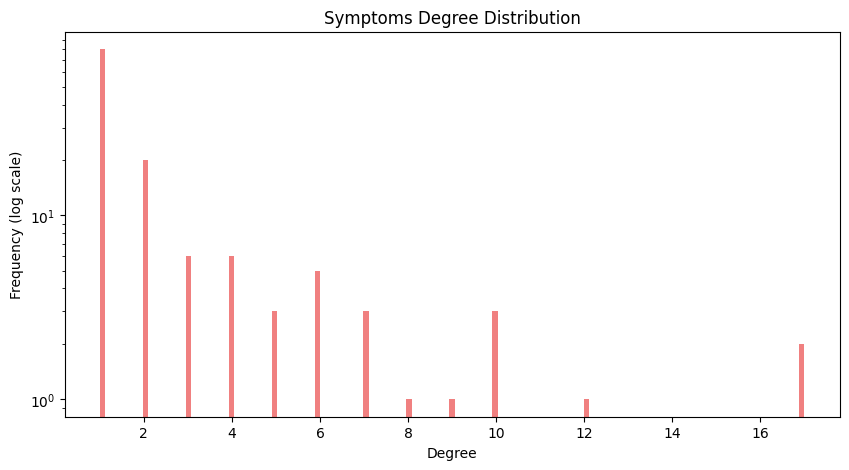

In [3]:
# Plot the distribution in log scale of the degree of the symptoms
plt.figure(figsize=(10,5))
plt.hist(ks[:,0], bins=ks.shape[0], log=True, color="lightcoral")
plt.title("Symptoms Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")


Text(0, 0.5, 'Frequency (log scale)')

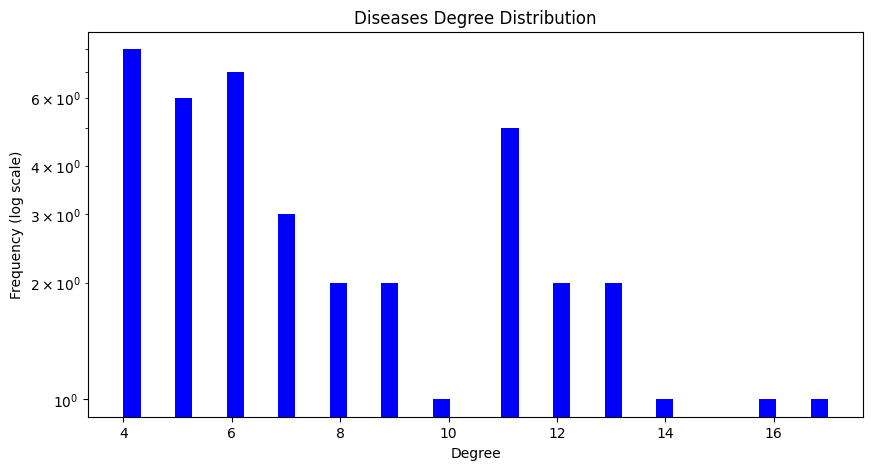

In [4]:
# Plot the distribution in log scale of the degree of the diseases
plt.figure(figsize=(10, 5))
plt.hist(kd[:,0], bins=kd.shape[0], log=True, color="blue")
plt.title("Diseases Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")

## Second level metrics distribution

Text(0, 0.5, 'Frequency (log scale)')

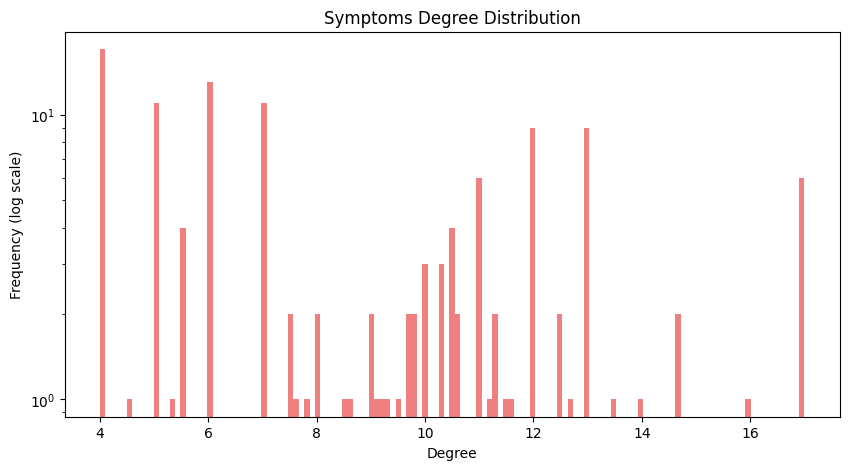

In [5]:
# Plot the distribution in log scale of the degree of the symptoms
plt.figure(figsize=(10, 5))
plt.hist(ks[:,1], bins=ks.shape[0], log=True, color="lightcoral")
plt.title("Symptoms Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")

Text(0, 0.5, 'Frequency (log scale)')

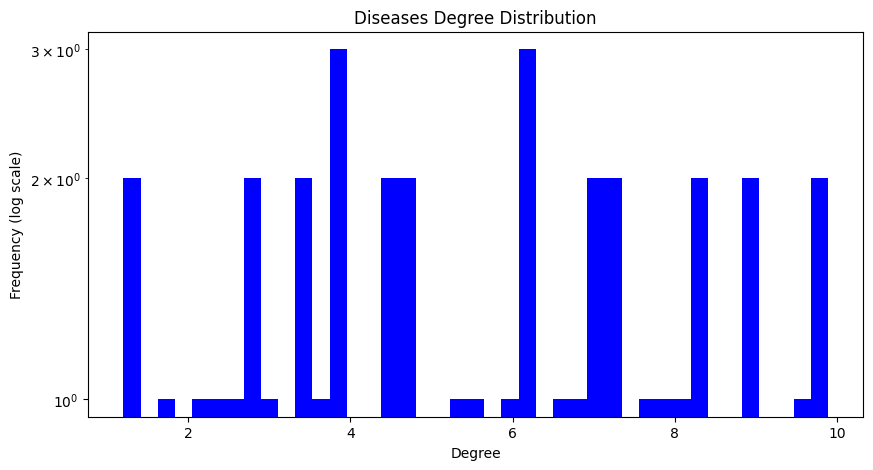

In [6]:
# Plot the distribution in log scale of the degree of the diseases
plt.figure(figsize=(10, 5))
plt.hist(kd[:,1], bins=kd.shape[0], log=True, color="blue")
plt.title("Diseases Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")

## Power Law Test (WIP)

Calculating best minimal value for power law fit
Power-law alpha parameter: 2.93406521361368


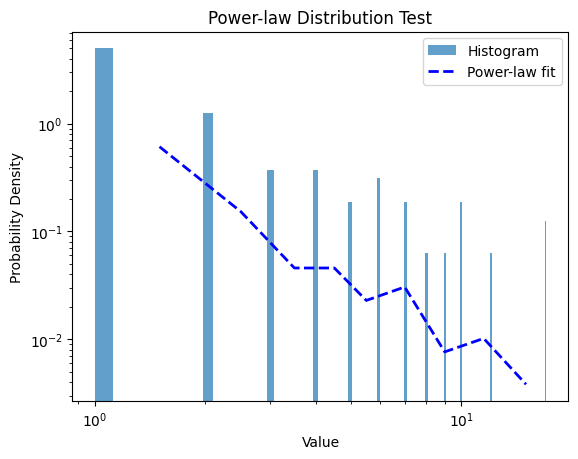

In [7]:
# Generate synthetic data following a power-law distribution
data = ks[:,0]  # You can replace this with your actual data

# Plot the histogram of the data
plt.hist(data, bins=ks.shape[0], density=True, alpha=0.7, label='Histogram')

# Fit the data to a power-law distribution
fit = powerlaw.Fit(data)

# Plot the power-law fit
fit.plot_pdf(color='b', linestyle='--', linewidth=2, label='Power-law fit')

# Display the parameters of the power-law fit
print(f"Power-law alpha parameter: {fit.alpha}")

# Show the plot
plt.title('Power-law Distribution Test')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()